# CREDIT CARD FRAUD DETECTION

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from termcolor import colored as cl
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
data = pd.read_csv("creditcard.csv")

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
Total_transactions = len(data)
normal = len(data[data.Class == 0])
fraudulent = len(data[data.Class == 1])
fraud_percentage = round(fraudulent/normal*100, 2)
print(cl('Total number of Trnsactions are {}'.format(Total_transactions), attrs = ['bold']))
print(cl('Number of Normal Transactions are {}'.format(normal), attrs = ['bold']))
print(cl('Number of fraudulent Transactions are {}'.format(fraudulent), attrs = ['bold']))
print(cl('Percentage of fraud Transactions is {}'.format(fraud_percentage), attrs = ['bold']))

Total number of Trnsactions are 284807
Number of Normal Transactions are 284315
Number of fraudulent Transactions are 492
Percentage of fraud Transactions is 0.17


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [7]:
legit=data[data.Class==0]
fraud=data[data.Class==1]

In [8]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [9]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [10]:
data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [11]:
data.drop(['Time'], axis=1, inplace=True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V15     284807 non-null  float64
 15  V16     284807 non-null  float64
 16  V17     284807 non-null  float64
 17  V18     284807 non-null  float64
 18  V19     284807 non-null  float64
 19  V20     284807 non-null  float64
 20  V21     284807 non-null  float64
 21  V22     28

## STRATIFIED SPLITTING OF DATASET

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data['Class']):
    strat_train_set=data.loc[train_index]
    strat_test_set=data.loc[test_index]

In [14]:
strat_test_set['Class'].value_counts()

0    56864
1       98
Name: Class, dtype: int64

In [15]:
strat_train_set['Class'].value_counts()

0    227451
1       394
Name: Class, dtype: int64

In [16]:
strat_train_set.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
265518,1.946747,-0.752526,-1.355130,-0.661630,1.502822,4.024933,-1.479661,1.139880,1.406819,-0.157403,...,0.076197,0.297537,0.307915,0.690980,-0.350316,-0.388907,0.077641,-0.032248,7.32,0
180305,2.035149,-0.048880,-3.058693,0.247945,2.943487,3.298697,-0.002192,0.674782,0.045826,0.284864,...,0.038628,0.228197,0.035542,0.707090,0.512885,-0.471198,0.002520,-0.069002,2.99,0
42664,-0.991920,0.603193,0.711976,-0.992425,-0.825838,1.956261,-2.212603,-5.037523,0.000772,-2.009561,...,-2.798352,0.109526,-0.436530,-0.932803,0.826684,0.913773,0.038049,0.185340,175.10,0
198723,2.285718,-1.500239,-0.747565,-1.668119,-1.394143,-0.350339,-1.427984,0.010010,-1.118447,1.756121,...,-0.139670,0.077013,0.208310,-0.538236,-0.278032,-0.162068,0.018045,-0.063005,6.10,0
82325,-0.448747,-1.011440,0.115903,-3.454854,0.715771,-0.147490,0.504347,-0.113817,-0.044782,-0.558955,...,-0.243245,-0.173298,-0.006692,-1.362383,-0.292234,-0.144622,-0.032580,-0.064194,86.10,0


In [17]:
strat_train_set.groupby('Class').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,0.008952,-0.006698,0.011860,-0.007976,0.005548,0.001230,0.009673,-0.001453,0.005189,0.009462,...,-0.001621,-0.000719,0.000214,0.000159,-0.000089,-0.000690,0.000043,-0.000341,0.000020,88.111486
1,-4.707808,3.588729,-7.068378,4.592975,-3.101629,-1.387192,-5.539909,0.587920,-2.589654,-5.687216,...,0.358018,0.628814,0.051318,-0.062790,-0.109108,0.019602,0.047827,0.155933,0.077212,125.591472


In [18]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227845 entries, 265518 to 17677
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      227845 non-null  float64
 1   V2      227845 non-null  float64
 2   V3      227845 non-null  float64
 3   V4      227845 non-null  float64
 4   V5      227845 non-null  float64
 5   V6      227845 non-null  float64
 6   V7      227845 non-null  float64
 7   V8      227845 non-null  float64
 8   V9      227845 non-null  float64
 9   V10     227845 non-null  float64
 10  V11     227845 non-null  float64
 11  V12     227845 non-null  float64
 12  V13     227845 non-null  float64
 13  V14     227845 non-null  float64
 14  V15     227845 non-null  float64
 15  V16     227845 non-null  float64
 16  V17     227845 non-null  float64
 17  V18     227845 non-null  float64
 18  V19     227845 non-null  float64
 19  V20     227845 non-null  float64
 20  V21     227845 non-null  float64
 21  V22   

In [19]:
#GENERATING MATRIX OF FEATURES
X = strat_train_set.iloc[:,0:29].values
Y = strat_train_set.iloc[:,-1].values
X_test = strat_test_set.iloc[:,0:29].values
Y_test = strat_test_set.iloc[:,-1].values

## ARTIFICIAL NEURAL NETWORK (ANN) 

In [20]:
#INITIALISING ANN
ann = tf.keras.models.Sequential()

In [21]:
#ADDING FIRST HIDDEN LAYER
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

In [22]:
#ADDING SECOND HIDDEN LAYER
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))
 

In [23]:
#ADDING OUTPUT LAYER
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

In [24]:
#COMPILING ANN
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [25]:
#Fitting ANN
ann.fit(X,Y,batch_size=32,epochs = 10)

Epoch 1/10
7121/7121 [==============================] - 9s 1ms/step - loss: 0.0225 - accuracy: 0.9982
Epoch 2/10
7121/7121 [==============================] - 10s 1ms/step - loss: 0.0080 - accuracy: 0.9992
Epoch 3/10
7121/7121 [==============================] - 8s 1ms/step - loss: 0.0062 - accuracy: 0.9993
Epoch 4/10
7121/7121 [==============================] - 8s 1ms/step - loss: 0.0054 - accuracy: 0.9993
Epoch 5/10
7121/7121 [==============================] - 8s 1ms/step - loss: 0.0054 - accuracy: 0.9993
Epoch 6/10
7121/7121 [==============================] - 8s 1ms/step - loss: 0.0042 - accuracy: 0.9994
Epoch 7/10
7121/7121 [==============================] - 8s 1ms/step - loss: 0.0046 - accuracy: 0.9993
Epoch 8/10
7121/7121 [==============================] - 8s 1ms/step - loss: 0.0041 - accuracy: 0.9993
Epoch 9/10
7121/7121 [==============================] - 8s 1ms/step - loss: 0.0043 - accuracy: 0.9993
Epoch 10/10
7121/7121 [==============================] - 8s 1ms/step - loss: 0.00

In [26]:
Y_test_ANN = ann.predict(X_test)
for i in range(56962):
    if Y_test_ANN[i]>0.5:
        Y_test_ANN[i]=1;
    else:
        Y_test_ANN[i]=0;

In [27]:
#GENERATING THE CONFUSION MATRIX
cf_matrix1 = confusion_matrix(Y_test,Y_test_ANN)
print(cf_matrix1)

[[56847    17]
 [   21    77]]


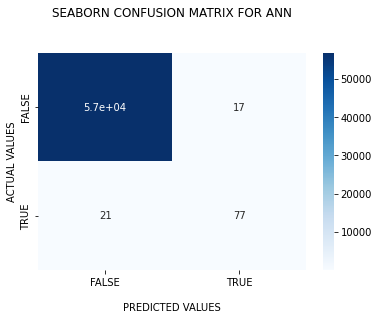

In [28]:
ax = sns.heatmap(cf_matrix1, annot=True, cmap='Blues')

ax.set_title('SEABORN CONFUSION MATRIX FOR ANN\n\n');
ax.set_xlabel('\nPREDICTED VALUES')
ax.set_ylabel('ACTUAL VALUES');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['FALSE','TRUE'])
ax.yaxis.set_ticklabels(['FALSE','TRUE'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [29]:
# CONFUSIN MATRIX PARAMETERS
print("ANN MODEL: \n")
p_ann = precision_score(Y_test,Y_test_ANN)
print("PRECISION:",p_ann*100, "%")
r_ann = recall_score(Y_test,Y_test_ANN)
print("\n RECALL:",r_ann*100, "%")
f1_ann = f1_score(Y_test,Y_test_ANN)
print("\n F1_SCORE:",f1_ann*100, "%")
acc_ann = accuracy_score(Y_test,Y_test_ANN)*100
print("\n ACCURACY:",acc_ann,"%")

ANN MODEL: 

PRECISION: 81.91489361702128 %

 RECALL: 78.57142857142857 %

 F1_SCORE: 80.20833333333333 %

 ACCURACY: 99.93328885923948 %


## XGBOOST (XGB)

In [30]:
xgb = XGBClassifier(max_depth = 4)
xgb.fit(X,Y)
Y_test_XGB = xgb.predict(X_test)

In [31]:
#GENERATING THE CONFUSION MATRIX
cf_matrix3 = confusion_matrix(Y_test,Y_test_XGB)
print(cf_matrix3)

[[56858     6]
 [   20    78]]


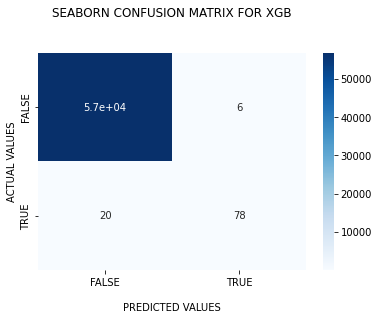

In [32]:
ax = sns.heatmap(cf_matrix3, annot=True, cmap='Blues')

ax.set_title('SEABORN CONFUSION MATRIX FOR XGB\n\n');
ax.set_xlabel('\nPREDICTED VALUES')
ax.set_ylabel('ACTUAL VALUES');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['FALSE','TRUE'])
ax.yaxis.set_ticklabels(['FALSE','TRUE'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [33]:
# CONFUSIN MATRIX PARAMETERS
print("XGB MODEL: \n")
p_xgb = precision_score(Y_test,Y_test_XGB)
print("PRECISION:",p_xgb*100, "%")
r_xgb = recall_score(Y_test,Y_test_XGB)
print("\n RECALL:",r_xgb*100, "%")
f1_xgb = f1_score(Y_test,Y_test_XGB)
print("\n F1_SCORE:",f1_xgb*100, "%")
acc_xgb = accuracy_score(Y_test,Y_test_XGB)*100
print("\n ACCURACY:",acc_xgb,"%")

XGB MODEL: 

PRECISION: 92.85714285714286 %

 RECALL: 79.59183673469387 %

 F1_SCORE: 85.71428571428572 %

 ACCURACY: 99.95435553526913 %


## NAIVE BAYES CLASSIFIER

In [34]:
nb = GaussianNB()
nb.fit(X,Y)
Y_test_NB = nb.predict(X_test)

In [35]:
#GENERATING THE CONFUSION MATRIX
cf_matrix4 = confusion_matrix(Y_test,Y_test_NB)
print(cf_matrix4)

[[55534  1330]
 [   15    83]]


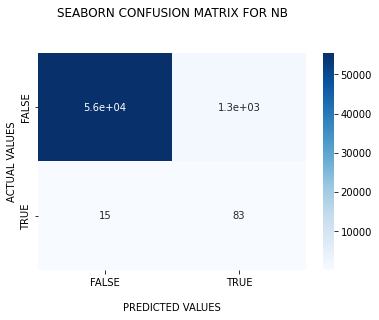

In [36]:
ax = sns.heatmap(cf_matrix4, annot=True, cmap='Blues')

ax.set_title('SEABORN CONFUSION MATRIX FOR NB\n\n');
ax.set_xlabel('\nPREDICTED VALUES')
ax.set_ylabel('ACTUAL VALUES');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['FALSE','TRUE'])
ax.yaxis.set_ticklabels(['FALSE','TRUE'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [37]:
# CONFUSIN MATRIX PARAMETERS
print("NB MODEL: \n")
p_nb = precision_score(Y_test,Y_test_NB)
print("PRECISION:",p_nb*100, "%")
r_nb = recall_score(Y_test,Y_test_NB)
print("\n RECALL:",r_nb*100, "%")
f1_nb = f1_score(Y_test,Y_test_NB)
print("\n F1_SCORE:",f1_nb*100, "%")
acc_nb = accuracy_score(Y_test,Y_test_NB)*100
print("\n ACCURACY:",acc_nb,"%")

NB MODEL: 

PRECISION: 5.874026893135174 %

 RECALL: 84.6938775510204 %

 F1_SCORE: 10.986101919258768 %

 ACCURACY: 97.6387767283452 %


## KNN ( K NEAREST NEIGHBOR)

In [38]:
n = 7
KNN = KNeighborsClassifier(n_neighbors = n, metric='minkowski', p=2)
KNN.fit(X,Y)
Y_test_KNN = KNN.predict(X_test)

In [39]:
#GENERATING THE CONFUSION MATRIX
cf_matrix3 = confusion_matrix(Y_test,Y_test_KNN)
print(cf_matrix3)

[[56854    10]
 [   32    66]]


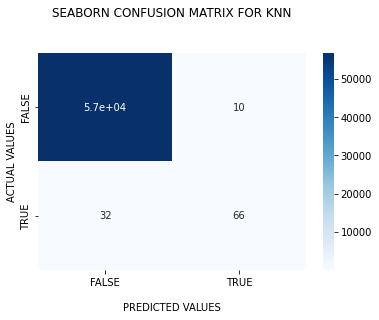

In [40]:
ax = sns.heatmap(cf_matrix3, annot=True, cmap='Blues')

ax.set_title('SEABORN CONFUSION MATRIX FOR KNN\n\n');
ax.set_xlabel('\nPREDICTED VALUES')
ax.set_ylabel('ACTUAL VALUES');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['FALSE','TRUE'])
ax.yaxis.set_ticklabels(['FALSE','TRUE'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [41]:
# CONFUSIN MATRIX PARAMETERS
print("NB MODEL: \n")
p_knn = precision_score(Y_test,Y_test_KNN)
print("PRECISION:",p_knn*100, "%")
r_knn = recall_score(Y_test,Y_test_KNN)
print("\n RECALL:",r_knn*100, "%")
f1_knn = f1_score(Y_test,Y_test_KNN)
print("\n F1_SCORE:",f1_knn*100, "%")
acc_knn = accuracy_score(Y_test,Y_test_KNN)*100
print("\n ACCURACY:",acc_knn,"%")

NB MODEL: 

PRECISION: 86.8421052631579 %

 RECALL: 67.3469387755102 %

 F1_SCORE: 75.86206896551724 %

 ACCURACY: 99.92626663389628 %


## DECISION TREE

In [42]:
DT = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
DT.fit(X,Y)
Y_test_DT = DT.predict(X_test)

In [43]:
#GENERATING THE CONFUSION MATRIX
cf_matrix5 = confusion_matrix(Y_test,Y_test_DT)
print(cf_matrix5)

[[56848    16]
 [   17    81]]


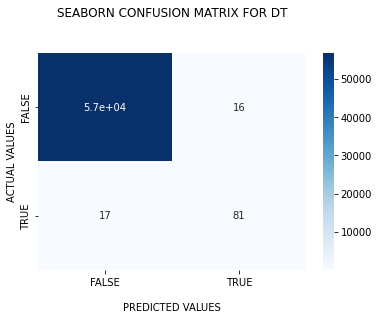

In [44]:
ax = sns.heatmap(cf_matrix5, annot=True, cmap='Blues')

ax.set_title('SEABORN CONFUSION MATRIX FOR DT\n\n');
ax.set_xlabel('\nPREDICTED VALUES')
ax.set_ylabel('ACTUAL VALUES');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['FALSE','TRUE'])
ax.yaxis.set_ticklabels(['FALSE','TRUE'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [45]:
# CONFUSIN MATRIX PARAMETERS
print("DT MODEL: \n")
p_dt = precision_score(Y_test,Y_test_DT)
print("PRECISION:",p_dt*100, "%")
r_dt = recall_score(Y_test,Y_test_DT)
print("\n RECALL:",r_dt*100, "%")
f1_dt = f1_score(Y_test,Y_test_DT)
print("\n F1_SCORE:",f1_dt*100, "%")
acc_dt = accuracy_score(Y_test,Y_test_DT)*100
print("\n ACCURACY:",acc_dt,"%")

DT MODEL: 

PRECISION: 83.50515463917526 %

 RECALL: 82.6530612244898 %

 F1_SCORE: 83.07692307692307 %

 ACCURACY: 99.9420666409185 %


## LOGISTIC REGRESSION

In [46]:
lr = LogisticRegression(max_iter = 10000)
lr.fit(X,Y)
Y_test_LR = lr.predict(X_test)

In [47]:
#GENERATING THE CONFUSION MATRIX
cf_matrix6 = confusion_matrix(Y_test,Y_test_LR)
print(cf_matrix6)

[[56851    13]
 [   34    64]]


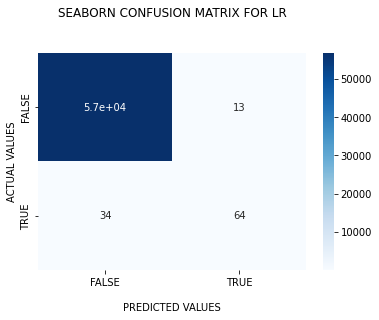

In [48]:
ax = sns.heatmap(cf_matrix6, annot=True, cmap='Blues')

ax.set_title('SEABORN CONFUSION MATRIX FOR LR\n\n');
ax.set_xlabel('\nPREDICTED VALUES')
ax.set_ylabel('ACTUAL VALUES');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['FALSE','TRUE'])
ax.yaxis.set_ticklabels(['FALSE','TRUE'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [49]:
# CONFUSIN MATRIX PARAMETERS
print("LR MODEL: \n")
p_lr = precision_score(Y_test,Y_test_LR)
print("PRECISION:",p_lr*100, "%")
r_lr = recall_score(Y_test,Y_test_LR)
print("\n RECALL:",r_lr*100, "%")
f1_lr = f1_score(Y_test,Y_test_LR)
print("\n F1_SCORE:",f1_lr*100, "%")
acc_lr = accuracy_score(Y_test,Y_test_LR)*100
print("\n ACCURACY:",acc_lr,"%")

LR MODEL: 

PRECISION: 83.11688311688312 %

 RECALL: 65.3061224489796 %

 F1_SCORE: 73.14285714285714 %

 ACCURACY: 99.91748885221726 %


## RANDOM FOREST 

In [50]:
rf = RandomForestClassifier(max_depth = 4)
rf.fit(X,Y)
Y_test_RF = rf.predict(X_test)

In [51]:
#GENERATING THE CONFUSION MATRIX
cf_matrix7 = confusion_matrix(Y_test,Y_test_RF)
print(cf_matrix7)

[[56855     9]
 [   30    68]]


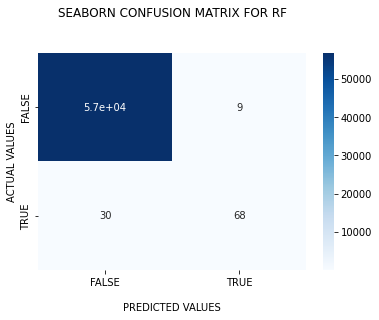

In [52]:
ax = sns.heatmap(cf_matrix7, annot=True, cmap='Blues')

ax.set_title('SEABORN CONFUSION MATRIX FOR RF\n\n');
ax.set_xlabel('\nPREDICTED VALUES')
ax.set_ylabel('ACTUAL VALUES');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['FALSE','TRUE'])
ax.yaxis.set_ticklabels(['FALSE','TRUE'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [53]:
# CONFUSIN MATRIX PARAMETERS
print("RF MODEL: \n")
p_rf = precision_score(Y_test,Y_test_RF)
print("PRECISION:",p_rf*100, "%")
r_rf = recall_score(Y_test,Y_test_RF)
print("\n RECALL:",r_rf*100, "%")
f1_rf = f1_score(Y_test,Y_test_RF)
print("\n F1_SCORE:",f1_rf*100, "%")
acc_rf = accuracy_score(Y_test,Y_test_RF)*100
print("\n ACCURACY:",acc_rf,"%")

RF MODEL: 

PRECISION: 88.31168831168831 %

 RECALL: 69.38775510204081 %

 F1_SCORE: 77.71428571428571 %

 ACCURACY: 99.93153330290369 %


## SUPPORT VECTOR MACHINE (SVM)

In [ ]:
svm = SVC()
svm.fit(X,Y)
Y_test_SVM = svm.predict(X_test)

In [ ]:
#GENERATING THE CONFUSION MATRIX
cf_matrix8 = confusion_matrix(Y_test,Y_test_SVM)
print(cf_matrix8)

In [ ]:
ax = sns.heatmap(cf_matrix8, annot=True, cmap='Blues')

ax.set_title('SEABORN CONFUSION MATRIX FOR SVM\n\n');
ax.set_xlabel('\nPREDICTED VALUES')
ax.set_ylabel('ACTUAL VALUES');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['FALSE','TRUE'])
ax.yaxis.set_ticklabels(['FALSE','TRUE'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
# CONFUSIN MATRIX PARAMETERS
print("SVM MODEL: \n")
p_svm = precision_score(Y_test,Y_test_SVM)
print("PRECISION:",p_svm*100, "%")
r_svm = recall_score(Y_test,Y_test_SVM)
print("\n RECALL:",r_svm*100, "%")
f1_svm = f1_score(Y_test,Y_test_SVM)
print("\n F1_SCORE:",f1_svm*100, "%")
acc_svm = accuracy_score(Y_test,Y_test_SVM)*100
print("\n ACCURACY:",acc_svm,"%")

## STACKED MODEL

In [ ]:
# DEFINING ESTIMATORS
estimator_list = [
    ('xgb',xgb),
('rf',rf),
('dt',DT),
('knn',KNN),
('lr',lr),
('nb',nb),
('svm',svm)]

# Build stack model
stack_model = StackingClassifier(
    estimators=estimator_list, final_estimator=LogisticRegression()
)
#TRAIN STACKED MODEL
stack_model.fit(X,Y)

# Make predictions
Y_test_stacked = stack_model.predict(X_test)

In [ ]:
#GENERATING THE CONFUSION MATRIX
cf_matrix7 = confusion_matrix(Y_test,Y_test_stacked)
print(cf_matrix7)

In [ ]:
ax = sns.heatmap(cf_matrix7, annot=True, cmap='Blues')

ax.set_title('SEABORN CONFUSION MATRIX FOR STACKED\n\n');
ax.set_xlabel('\nPREDICTED VALUES')
ax.set_ylabel('ACTUAL VALUES');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['FALSE','TRUE'])
ax.yaxis.set_ticklabels(['FALSE','TRUE'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
# CONFUSIN MATRIX PARAMETERS
print("STACKED MODEL: \n")
p_stacked = precision_score(Y_test,Y_test_stacked)
print("PRECISION:",p_stacked*100, "%")
r_stacked = recall_score(Y_test,Y_test_stacked)
print("\n RECALL:",r_stacked*100, "%")
f1_stacked = f1_score(Y_test,Y_test_stacked)
print("\n F1_SCORE:",f1_stacked*100, "%")
acc_stacked = accuracy_score(Y_test,Y_test_stacked)*100
print("\n ACCURACY:",acc_stacked,"%")

## ALL RESULTS

In [ ]:
acc_test_list = {'NB':acc_nb/100,
'XGB':acc_xgb/100,
'KNN':acc_knn/100,
'DT':acc_dt/100,
'RF':acc_rf/100,
'ANN':acc_ann/100,
'LR':acc_lr/100,
'SVM':acc_svm/100,
'STACKED':acc_stacked/100}

prec_test_list = {'NB':p_nb,
'XGB':p_xgb,
'KNN':p_knn,
'DT':p_dt,
'RF':p_rf,
'ANN':p_ann,
'LR':p_lr,
'SVM':p_svm,
'STACKED':p_stacked}

rec_test_list = {'NB':r_nb,
'XGB':r_xgb,
'KNN':r_knn,
'DT':r_dt,
'RF':r_rf,
'ANN':r_ann,
'LR':r_lr,
'SVM':r_svm,
'STACKED':r_stacked}

f1_test_list = {'NB':f1_nb,
'XGB':f1_xgb,
'KNN':f1_knn,
'DT':f1_dt,
'RF':f1_rf,
'ANN':f1_ann,
'LR':f1_lr,
'SVM':f1_svm,
'STACKED':f1_stacked}

In [ ]:
acc_df = pd.DataFrame.from_dict(acc_test_list, orient='index', columns=['ACCURACY'])
prec_df = pd.DataFrame.from_dict(prec_test_list, orient='index', columns=['PRECISION'])
rec_df = pd.DataFrame.from_dict(rec_test_list, orient='index', columns=['RECALL'])
f1_df = pd.DataFrame.from_dict(f1_test_list, orient='index', columns=['F1'])
df = pd.concat([acc_df, prec_df, rec_df, f1_df], axis=1)
df